# Scrapping Carrefour website

# Choosing what to scrap

In [1]:
# Trying to scrap products or promotions

In [4]:
def type_scrapping():
    type_scrapping=['promotions', 'products']
    while True:
        scrap=input('Would you like to scrap promotions or products [promotions/products]? ',)
        if scrap in type_scrapping:
            break
    return scrap

In [5]:
scrap=type_scrapping()

Would you like to scrap promotions or products [promotions/products]? hum
Would you like to scrap promotions or products [promotions/products]? promotions


# Scrapping ALL products

In [2]:
# products

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 11 15:22:58 2020

@author: Camille
"""

# import libraries
import requests as r
import json
import pandas as pd
from bs4 import BeautifulSoup
import os
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns

#Defining functions

#Defining which category to scrap
def cat_name():
    print(r"""The categories are:
    - bio-et-ecologie
    - fruits-et-legumes
    - viandes-et-poissons
    - pains-et-patisseries
    - cremerie
    - traiteur
    - surgeles
    - epicerie-salee
    - epicerie-sucree
    - hygiene-et-beaute
    - boissons-sans-alcool
    - alcools-et-produits-aperitifs
    - hygiene-et-beaute
    - entretien-et-nettoyage
    - animaux
    - le-monde-de-bebe
    - jardin-outdoor
    - maison-interieur
    - cuisine-et-arts-de-la-table
    - electromenager
    - bricolage-auto
    - beaute-entretien-et-proprete
    - bagagerie-sport-et-loisirs
    - telephonie-et-objets-connectes
    - image-et-son
    - informatique-bureau
    - culture-et-jeux-videos
    - jeux-et-jouets
    """)
    list_cat=['bio-et-ecologie','fruits-et-legumes','viandes-et-poissons', 'pains-et-patisseries','cremerie','traiteur','surgeles','epicerie-salee','epicerie-sucree','hygiene-et-beaute','boissons-sans-alcool','alcools-et-produits-aperitifs','hygiene-et-beaute','entretien-et-nettoyage','animaux','le-monde-de-bebe','jardin-outdoor','maison-interieur','cuisine-et-arts-de-la-table','electromenager','bricolage-auto','beaute-entretien-et-proprete','bagagerie-sport-et-loisirs','telephonie-et-objets-connectes','image-et-son','informatique-bureau','culture-et-jeux-videos','jeux-et-jouets']
    while True:
        cat_name=input('What category would you like to scrap? ',)
        if cat_name in list_cat:
            break
    return cat_name



#Finding how many pages need to be scrapped
def pages_number_products(cat_name):
    url=f"https://www.carrefour.fr/r/{cat_name}?noRedirect=1&page=0"
    html = r.get(url).content;
    soup = BeautifulSoup(html)
    # i = number of products promoted
    number=[i.text.replace('\n','') for i in soup.select('h5')]
    i=int(number[0].split()[0])
    # checking number of product per page
    product_name=[i.text.replace('\n','') for i in soup.select('ul h2')]
    # n = number of pages of promo
    n=math.ceil(i/len(product_name))
    return n

#Scrapping pages
def scrapping_products():
    df_final=pd.DataFrame()
    for i in range(n+1):
        url=f'https://www.carrefour.fr/r/{cat_name}?noRedirect=1&page={i}'
        headers=f"""accept: application/json, text/plain, */*
        accept-encoding: gzip, deflate, br
        accept-language: fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7
        cache-control: no-cache
        cookie: TCPID=119551614271772534656; _ga=GA1.2.1334375845.1556892869; cookieIDCrfOne=V12019531614280.2021166067845266; TC_OPTOUT=0@@@@@@ALL; already_visitedOne=1; visid_incap_1982952=0RjOMFJXRuKKO5znr4FgKeRMzFwAAAAAQUIPAAAAAAD6n2mvQU/sqwDmJkARHJBk; tc_cj_v2=m_iZZZ%22**%22%27%20ZZZKOOPRSLRPQNRRZZZ%5D777_rn_lh%5BfyfcheZZZ222H.*-/%24-%7B+%7B-%24.H%7D*%28ZZZKOOQLKRRRQLLMZZZ%5D777m_iZZZ%22**%22%27%20ZZZKOQRKMKMSQNRKZZZ%5D; datadome=MV~uTOOCnVIzfg.ULn2qjQwiYrYCKiCPqVlIXhkojIZNBB1zJzAjb_LCHT2CCYufdPeKF5Omu7~Z9jwshB52Hgn-fgLks.1wkrj4LccckQ; _cs_c=0; _cs_id=9566bfd8-1a78-a240-f0bb-e8015b3551ba.1556892869.3.1578131399.1578131399.1.1591056869072; visid_incap_441619=vrnUei+7RLiL2Xr3UUmTzfgij14AAAAAQUIPAAAAAABOtZUZlXTnCzjXe1PMdHUQ; visid_incap_1722501=z8YspOTjRLmNxY1jMdqc2voij14AAAAAQUIPAAAAAAAz5k9o0TPe5INp8+VLBGMZ; FRONTONE_USER=1589030911; FRONTONE_SESSID=b63750e3dfbafa4034d6cf3e8d2d558c; FRONTONE_SESSION_ID=e63380316c097c37050207ec718741fff9259edc; nlbi_441619=hPsnDNGFBgcuMoocJv8P3AAAAADvRtLIitBw0DCDaulsolSv; incap_ses_766_441619=xOrCJJ75ZFMuHdRpFmKhCqARk14AAAAAAbkGgZaI3ZwKzWSE9YLNdw==; incap_ses_766_1722501=V7G5dFZNVT+iJNRpFmKhCrsRk14AAAAAXCoyqmHLrIAbZR4ql84New==; QueueITAccepted-SDFrts345E-V3_prodevent=EventId%3Dprodevent%26QueueId%3D353322c4-4a85-4736-95aa-c51441010113%26RedirectType%3Dsafetynet%26IssueTime%3D1586696637%26Hash%3Df43739e176b3b7aaa718bb08ec22f99ce1e1414fc95bb20a6472efd106b12563; visid_incap_2237321=MIUgPDc1SUulJogUgHnXuewRk14AAAAAQUIPAAAAAACC1NtTLjWHs8UOS/4WjTEn; incap_ses_766_2237321=r+MCOZqfWyiAMtRpFmKhCuwRk14AAAAA3H8Vhks4p1T4AV7SEIzY0A==; ABTasty=uid%3D20041215043664510%26fst%3D1586696676950%26pst%3Dnull%26cst%3D1586696676950%26ns%3D1%26pvt%3D18%26pvis%3D18%26th%3D562227.699323.18.18.1.1.1586696677071.1586696730088.1_573142.710608.17.17.1.1.1586696677090.1586696730101.1_575385.713246.17.17.1.1.1586696677179.1586696730128.1; ab-popin_solutions=1; ABTastySession=sen%3D110__referrer%3Dhttps%3A//www.carrefour.fr/r%3Ffilters%255Bproduct.categories.name%255D%255B0%255D%3DEntretien%2520et%2520nettoyage%26noRedirect%3D0__landingPage%3Dhttps%3A//www.carrefour.fr/r/alcools-et-produits-aperitifs__referrerSent%3Dtrue; ADRUM=s=1586696878563&r=https%3A%2F%2Fwww.carrefour.fr%2Fboutique%2Fparapharmacie%3F0; pageCounterCrfOne=46
        dnt: 1
        pragma: no-cache
        referer: https://www.carrefour.fr/r/{cat_name}?noRedirect=1&page={i}
        sec-fetch-dest: empty
        sec-fetch-mode: cors
        sec-fetch-site: same-origin
        user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36
        x-requested-with: XMLHttpRequest"""
        headers=dict([i.strip().split(': ') for i in headers.split('\n')])
        results=r.get(url, headers=headers).json()
        df=pd.json_normalize(results['data'])
        df1 = df[['attributes.ean','attributes.title', 'attributes.brand',  'attributes.categories','attributes.availability.purchasable', 'attributes.price.price', 'attributes.price.perUnitLabel']]
        df_final=df_final.append(df1)
        time.sleep(4)
        print(i)
    return df_final
    
def resetting_index(df_final):
    df_final=df_final.reset_index() 
    df_final.rename(columns={"index":"old_index"})
    return df_final

#cleaning data
def clean_cat(df_final):

    categories=[]

    for k in df_final.index:
        if df_final['attributes.categories'][k] == None:
            df_final['attributes.categories'][k] = [{'id': 'NA',
      'slug': 'NA',
      'label': ' Not specified',
      'uri': 'NA'},
     {'id': 'NA',
      'slug': 'NA',
      'label': 'Not specified',
      'uri': 'NA'},
     {'id': 'NA',
      'slug': 'NA',
      'label': 'Not specified',
      'uri': 'NA'}]

        categories.append([i['label'] for i in df_final['attributes.categories'][k]])
        category=[i[0] for i in categories]
        subcategory=[i[1] for i in categories]
    df_final['category']=category
    df_final['subcategory']=subcategory
    df_final=df_final.drop(['attributes.categories'], axis=1)
    return df_final

#renaming col
def renaming_col_products(df_final):
    df_ok=df_final.rename(columns={"attributes.ean": "EAN", "attributes.title": "product_name", 'attributes.brand':'brand', 'attributes.availability.purchasable':'purchasable', 'attributes.price.perUnitLabel':'price_per_unit','attributes.price.price':'price'})
    df_ok=df_ok[['EAN', 'product_name', 'brand', 'category', 'subcategory', 'purchasable', 'price', 'price_per_unit']]
    return df_ok

# data analysis
def group_category_products(df_final):
    df_final.groupby('category').mean()
    df_group=df_final.groupby(['category','subcategory']).count()['EAN']
    df_group=pd.DataFrame(df_group).rename(columns={'EAN':'count_products'})
    return df_group

# save final df into a csv
def save_df_products():
    os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 3/Web_Scrapping_project/Output')
    df_final.to_csv(f'Carrefour_products_{cat_name}.csv')
    
#creating graphs
    
def graph_subcat_products():
    df_category=pd.DataFrame(df_final.category.value_counts()).reset_index().rename(columns={'index':'Category', 'category':'Number of Products'})
    fig, ax = plt.subplots(figsize=(40,15))
    graph_subcat = sns.barplot(data=df_category, x='Category', y='Number of Products')
    plt.title('Products per category'+ f' {cat_name}'+'\n', fontsize=30)
    return graph_subcat

def graph_top_brands_products():
    brands=pd.DataFrame(df_final.brand.value_counts()).nlargest(10, 'brand').reset_index().rename(columns={'index':'Brands', 'brand':'Number of Products'})
    fig, ax = plt.subplots(figsize=(20,15))
    graph_brands = sns.barplot(data=brands, x='Brands', y='Number of Products')
    plt.title('Products per brands'+ f' {cat_name}'+ '\n', fontsize=20)    
    return graph_brands

#saving graphs

def save_viz(barchart,title):
    os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 3/Web_Scrapping_project/Output')
    fig = barchart.get_figure()
    fig.savefig(title+ '.png')
    plt.show()

    
#calling functions
if __name__ == '__main__':
    cat_name=cat_name()
    n=pages_number(cat_name)
    df_final=scrapping()
    df_final=resetting_index(df_final)
    df_final=clean_cat(df_final)
    df_final=renaming_col(df_final)
    df_group=group_category(df_final)
    save_df()
    #graphs
    subcat=graph_subcat()
    top_brands=graph_top_brands()
    #saving graphs
    save_viz(subcat,f'Products per subcategory {cat_name}')
    save_viz(top_brands, f'Products per brands (Top 10)  {cat_name}')

# Scrapping ALL promotions

0
1
2
3
4
5


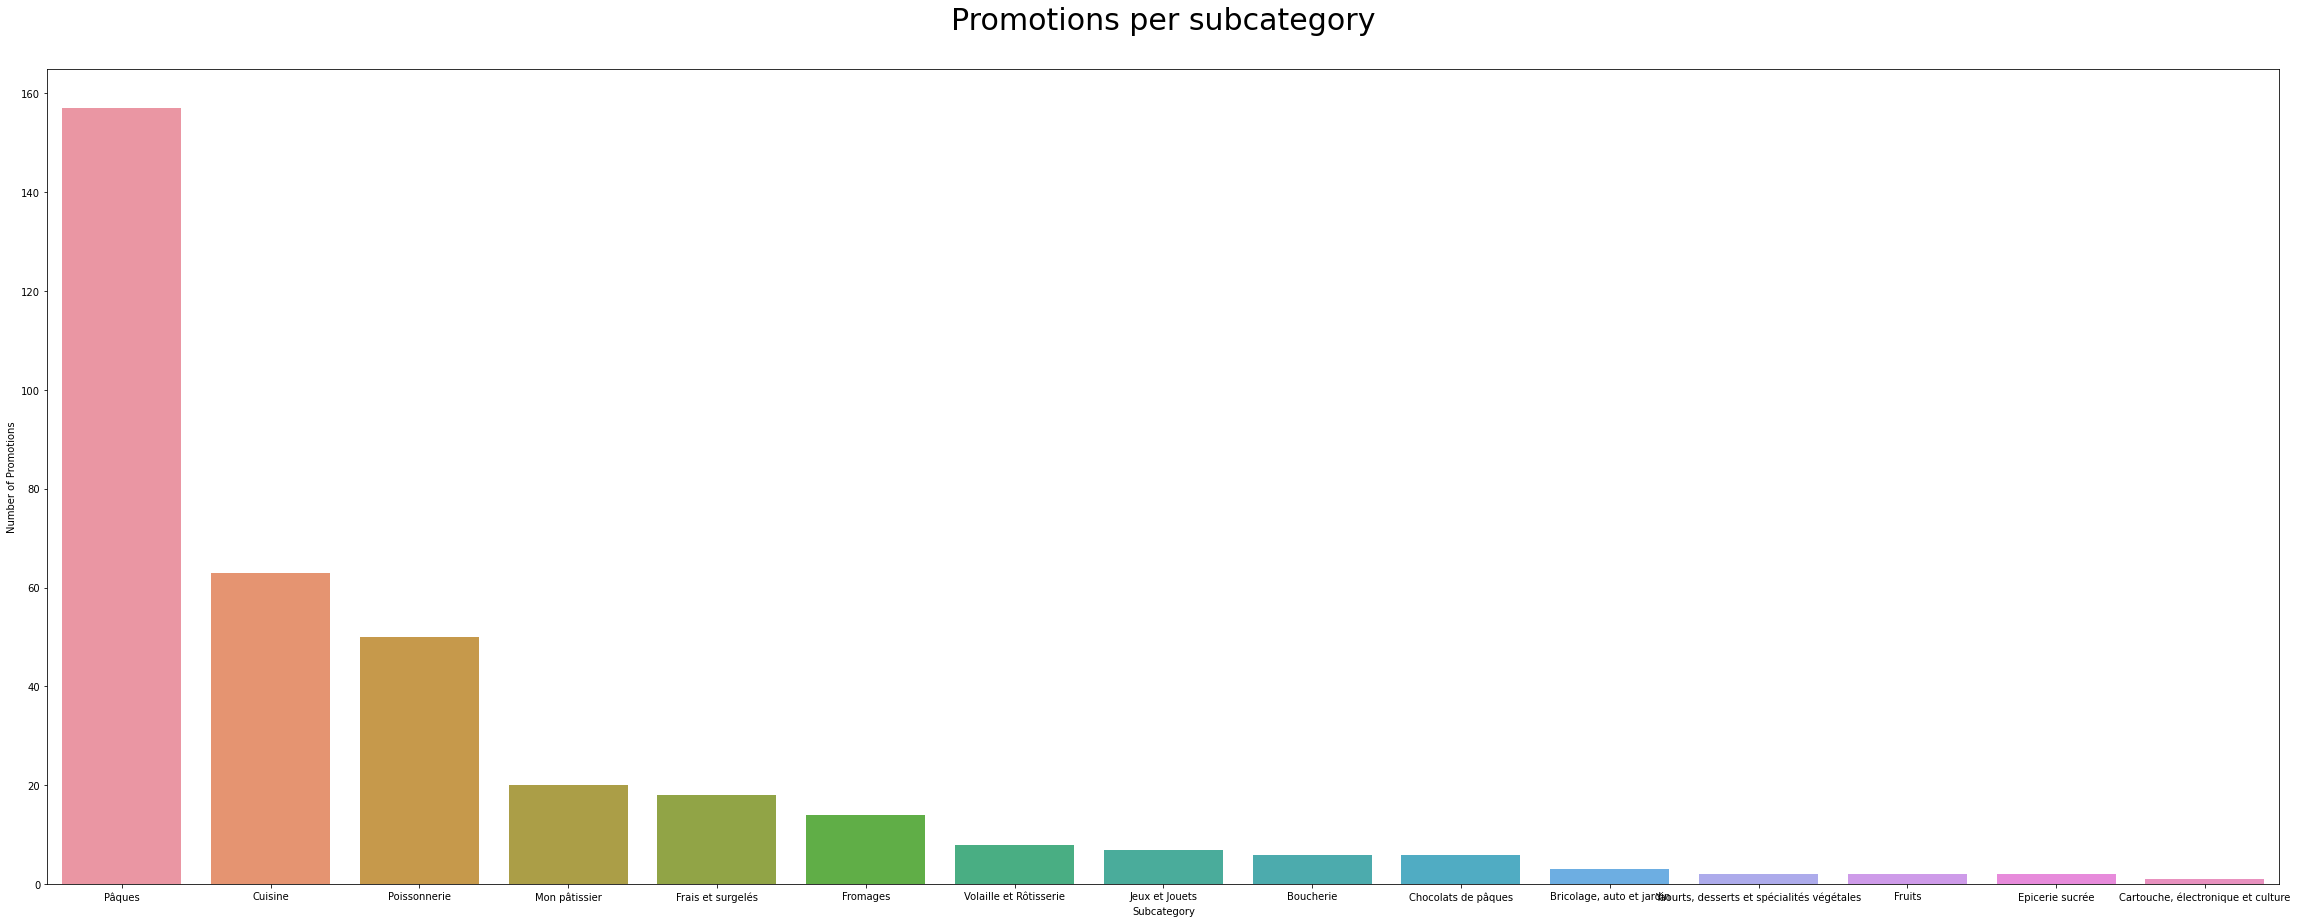

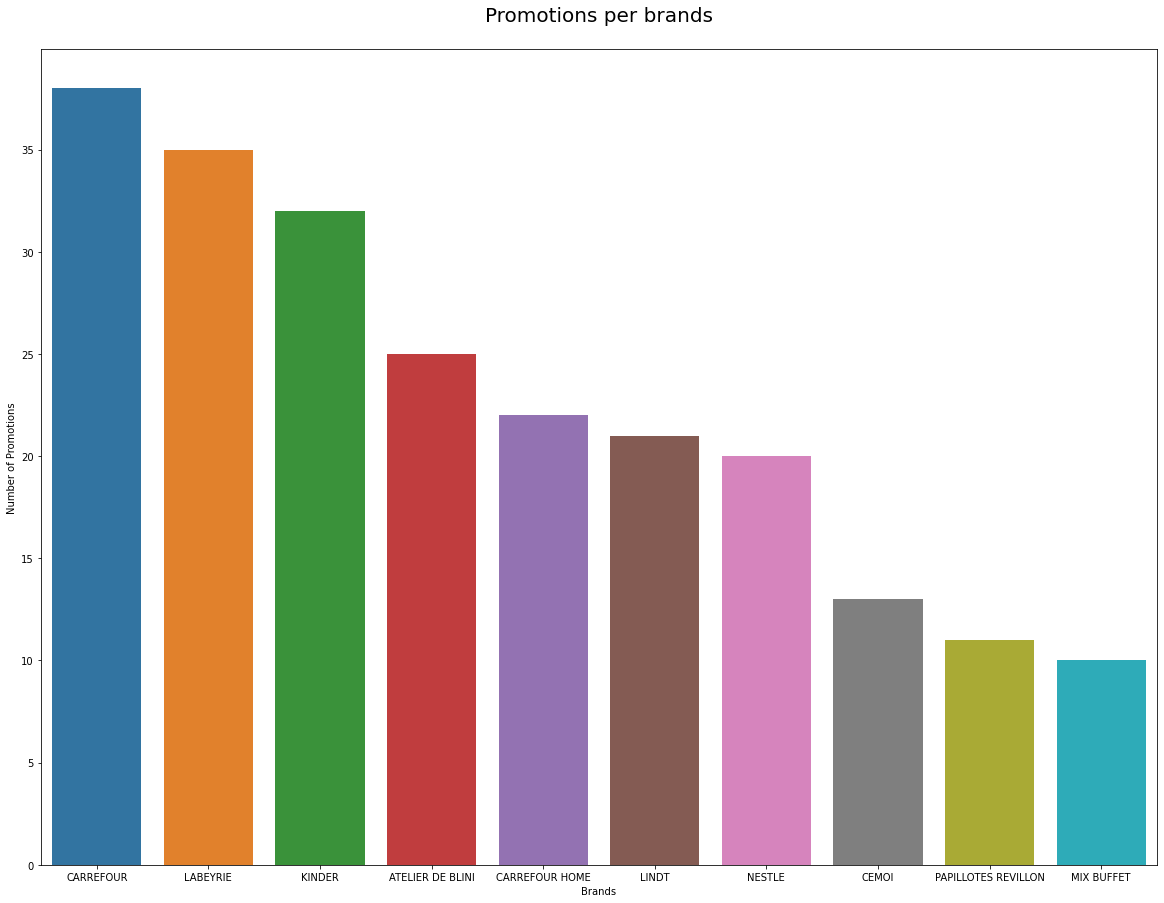

There are 141 promotions without any discounts


In [16]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 11 15:22:58 2020

@author: Camille
"""

# import libraries
import requests as r
import json
import pandas as pd
from bs4 import BeautifulSoup
import os
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns

#Defining functions



#Finding how many pages need to be scrapped
def pages_number(url):
    html = r.get(url).content;
    soup = BeautifulSoup(html)
    # i = number of products promoted
    number=[i.text.replace('\n','') for i in soup.select('h5')]
    i=int(number[0].split()[0])
    # checking number of product per page
    product_name=[i.text.replace('\n','') for i in soup.select('ul h2')]
    # n = number of pages of promo
    n=math.ceil(i/len(product_name))
    return n

#Scrapping pages
def scrapping():
    df_final=pd.DataFrame()
    for i in range(n+1):
        url=f"https://www.carrefour.fr/promotions?noRedirect=0&page={i}"
        headers=f"""accept: application/json, text/plain, */*
        accept-encoding: gzip, deflate, br
        accept-language: fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7
        cache-control: no-cache
        cookie: TCPID=119551614271772534656; _ga=GA1.2.1334375845.1556892869; cookieIDCrfOne=V12019531614280.2021166067845266; TC_OPTOUT=0@@@@@@ALL; already_visitedOne=1; visid_incap_1982952=0RjOMFJXRuKKO5znr4FgKeRMzFwAAAAAQUIPAAAAAAD6n2mvQU/sqwDmJkARHJBk; tc_cj_v2=m_iZZZ%22**%22%27%20ZZZKOOPRSLRPQNRRZZZ%5D777_rn_lh%5BfyfcheZZZ222H.*-/%24-%7B+%7B-%24.H%7D*%28ZZZKOOQLKRRRQLLMZZZ%5D777m_iZZZ%22**%22%27%20ZZZKOQRKMKMSQNRKZZZ%5D; datadome=MV~uTOOCnVIzfg.ULn2qjQwiYrYCKiCPqVlIXhkojIZNBB1zJzAjb_LCHT2CCYufdPeKF5Omu7~Z9jwshB52Hgn-fgLks.1wkrj4LccckQ; _cs_c=0; _cs_id=9566bfd8-1a78-a240-f0bb-e8015b3551ba.1556892869.3.1578131399.1578131399.1.1591056869072; visid_incap_441619=vrnUei+7RLiL2Xr3UUmTzfgij14AAAAAQUIPAAAAAABOtZUZlXTnCzjXe1PMdHUQ; visid_incap_1722501=z8YspOTjRLmNxY1jMdqc2voij14AAAAAQUIPAAAAAAAz5k9o0TPe5INp8+VLBGMZ; FRONTONE_USER=1589030911; FRONTONE_SESSID=b63750e3dfbafa4034d6cf3e8d2d558c; FRONTONE_SESSION_ID=e63380316c097c37050207ec718741fff9259edc; nlbi_441619=ufhBSxHyMEoXfsE3Jv8P3AAAAABTP2fpV1zP/JtDBdulhzAa; incap_ses_766_441619=MtovSnQkoT9/JNpoFmKhCqEbkF4AAAAAc7N3y/70ukqqav4TtYvpDQ==; pageCounterCrfOne=1; QueueITAccepted-SDFrts345E-V3_prodevent=EventId%3Dprodevent%26QueueId%3D54e303e1-7614-444d-8c92-dbdad2d61b4a%26RedirectType%3Dsafetynet%26IssueTime%3D1586502577%26Hash%3D21030c8a62ca512d24f5dcbcaacc1f41b3c042a6999d987071870a39842d6678
        dnt: 1
        pragma: no-cache
        referer: https://www.carrefour.fr/promotions?noRedirect=1&page={i}
        sec-fetch-dest: empty
        sec-fetch-mode: cors
        sec-fetch-site: same-origin
        user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36
        x-requested-with: XMLHttpRequest"""
        headers=dict([i.strip().split(': ') for i in headers.split('\n')])
        results=r.get(url, headers=headers).json()
        df=pd.json_normalize(results['data'])
        df['difference'] = df['attributes.promotion.messageArgs.initialPrice'] - df['attributes.promotion.messageArgs.discountedPrice']
        df1 = df[['attributes.ean','attributes.title', 'attributes.brand',  'attributes.categories','attributes.availability.purchasable', 'attributes.promotion.label', 'attributes.promotion.bestQuantity', 'attributes.promotion.messageArgs.discountedPrice','attributes.promotion.messageArgs.initialPrice', 'difference', 'attributes.promotion.discountLabel','attributes.price.perUnitLabel','attributes.promotion.promoStartDate','attributes.promotion.promoEndDate']]
        df_final=df_final.append(df1)
        time.sleep(2)
        print(i)
    return df_final
    
def resetting_index(df_final):
    df_final=df_final.reset_index() 
    df_final.rename(columns={"index":"old_index"})
    return df_final

#cleaning data
def clean_cat(df_final):
    categories=[]
    for k in df_final.index:
        categories.append([i['label'] for i in df_final['attributes.categories'][k]])
        category=[i[0] for i in categories]
        subcategory=[i[1] for i in categories]
    df_final['category']=category
    df_final['subcategory']=subcategory
    df_final=df_final.drop(['attributes.categories'], axis=1)
    return df_final

#renaming col
def renaming_col(df_final):
    df_ok=df_final.rename(columns={"attributes.ean": "EAN", "attributes.title": "product_name", 'attributes.brand':'brand', 'attributes.availability.purchasable':'purchasable', 'attributes.promotion.label':'promotion_type', 'attributes.promotion.bestQuantity': 'best_quantity', 'attributes.promotion.messageArgs.discountedPrice': 'discounted_price', 'attributes.promotion.messageArgs.initialPrice':'initial_price', 'attributes.promotion.discountLabel':'promo_description','attributes.price.perUnitLabel':'price_per_unit','attributes.promotion.promoStartDate':'Start_Date', 'attributes.promotion.promoEndDate':'End_Date'   })
    df_ok=df_ok[['EAN', 'product_name', 'brand', 'category', 'subcategory', 'purchasable', 'promotion_type', 'promo_description', 'best_quantity','price_per_unit', 'discounted_price', 'initial_price', 'difference','Start_Date','End_Date']]
    return df_ok

# data analysis
def group_category(df_final):
    df_final.groupby('category').mean()
    df_group=df_final.groupby(['category','subcategory']).count()['EAN']
    df_group=pd.DataFrame(df_group).rename(columns={'EAN':'count_promotion'})
    return df_group

# save final df into a csv
def save_df():
    os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 3/Web_Scrapping_project/Output')
    df_final.to_csv('Carrefour_promo.csv')
    
#creating graphs
    
def graph_subcat():
    df_subcategory=pd.DataFrame(df_final.subcategory.value_counts()).reset_index().rename(columns={'index':'Subcategory', 'subcategory':'Number of Promotions'})
    fig, ax = plt.subplots(figsize=(40,15))
    graph_subcat = sns.barplot(data=df_subcategory, x='Subcategory', y='Number of Promotions')
    plt.title('Promotions per subcategory'+ '\n', fontsize=30)
    return graph_subcat

def graph_top_brands():
    brands=pd.DataFrame(df_final.brand.value_counts()).nlargest(10, 'brand').reset_index().rename(columns={'index':'Brands', 'brand':'Number of Promotions'})
    fig, ax = plt.subplots(figsize=(20,15))
    graph_brands = sns.barplot(data=brands, x='Brands', y='Number of Promotions')
    plt.title('Promotions per brands'+ '\n', fontsize=20)    
    return graph_brands

#saving graphs

def save_viz(barchart,title):
    os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 3/Web_Scrapping_project/Output')
    fig = barchart.get_figure()
    fig.savefig(title+ '.png')
    plt.show()

    
#calling functions
if __name__ == '__main__':
    n=pages_number('https://www.carrefour.fr/promotions?noRedirect=0&page=0')
    df_final=scrapping()
    df_final=resetting_index(df_final)
    df_final=clean_cat(df_final)
    df_final=renaming_col(df_final)
    df_group=group_category(df_final)
    save_df()
    #graphs
    subcat=graph_subcat()
    top_brands=graph_top_brands()
    #saving graphs
    save_viz(subcat,'Promotions per subcategory' )
    save_viz(top_brands, 'Promotion per brands (Top 10)')

#computing promos without lower price
dfnull=df_final.loc[df_final['difference'] == float(0)]
print(f"There are {len(dfnull)} promotions without any discounts")

# Making the choice to scrap one

Would you like to scrap promotions or products [promotions/products]? products
The categories are:
    - bio-et-ecologie
    - fruits-et-legumes
    - viandes-et-poissons
    - pains-et-patisseries
    - cremerie
    - traiteur
    - surgeles
    - epicerie-salee
    - epicerie-sucree
    - hygiene-et-beaute
    - boissons-sans-alcool
    - alcools-et-produits-aperitifs
    - hygiene-et-beaute
    - entretien-et-nettoyage
    - animaux
    - le-monde-de-bebe
    - jardin-outdoor
    - maison-interieur
    - cuisine-et-arts-de-la-table
    - electromenager
    - bricolage-auto
    - beaute-entretien-et-proprete
    - bagagerie-sport-et-loisirs
    - telephonie-et-objets-connectes
    - image-et-son
    - informatique-bureau
    - culture-et-jeux-videos
    - jeux-et-jouets
    
What category would you like to scrap? bricolage-auto
0
1


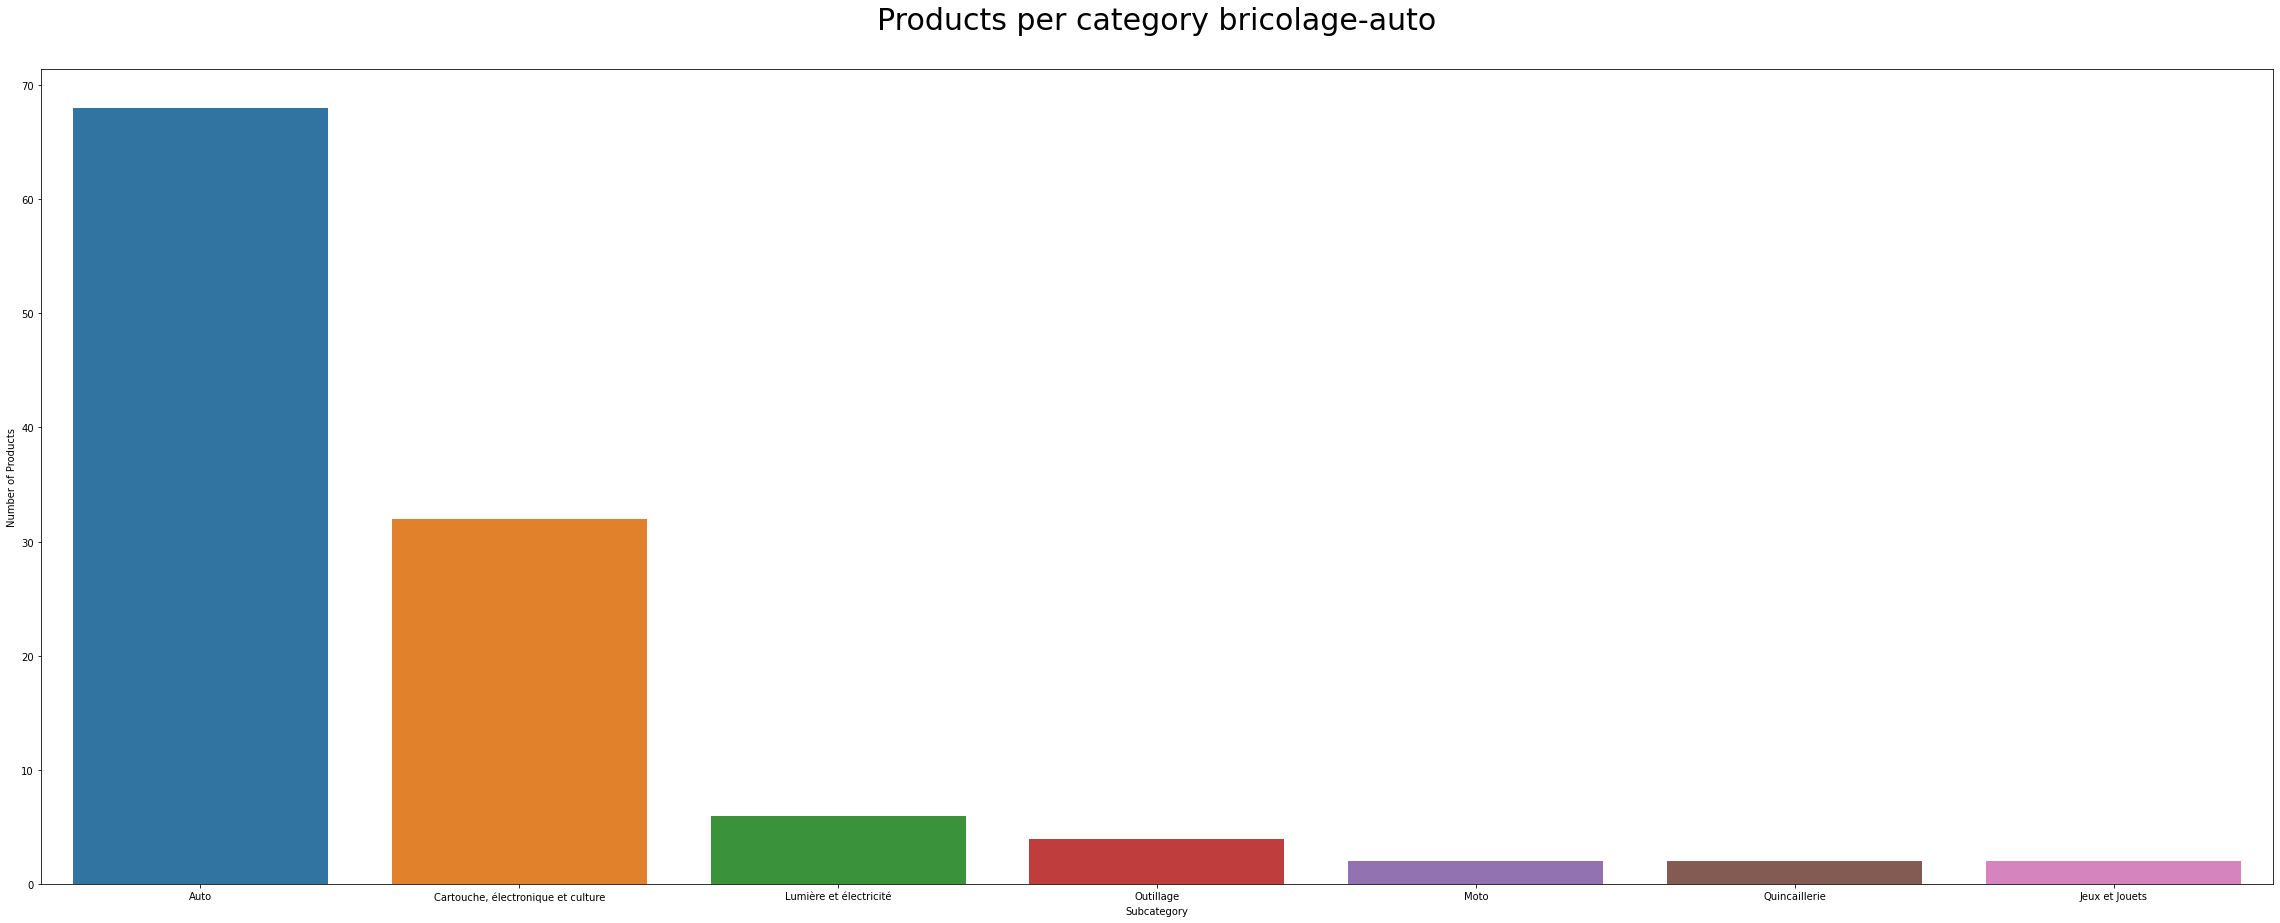

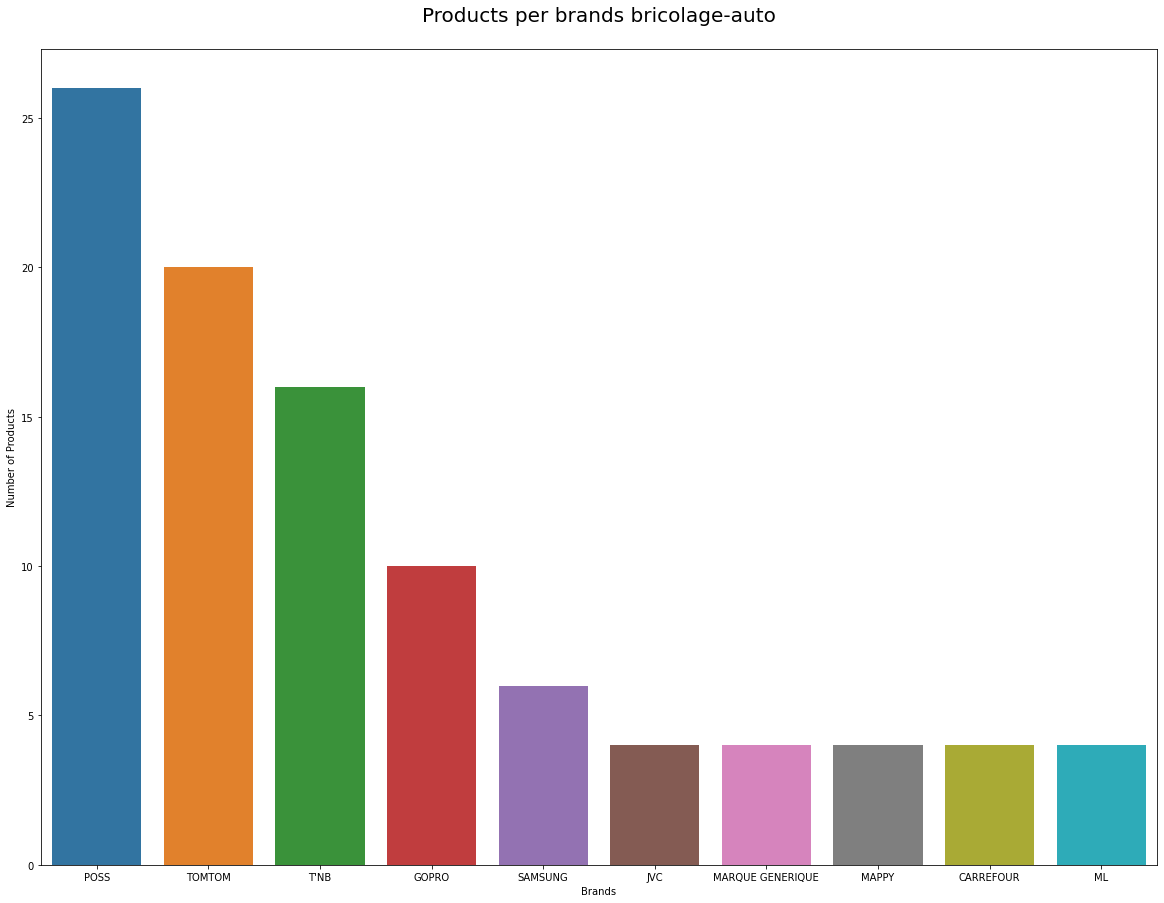

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 11 15:22:58 2020

@author: Camille
"""

# import libraries
import requests as r
import json
import pandas as pd
from bs4 import BeautifulSoup
import os
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns

#Defining functions

#What do we scrap:
def type_scrapping():
    type_scrapping=['promotions', 'products']
    while True:
        scrap=input('Would you like to scrap promotions or products [promotions/products]? ',)
        if scrap in type_scrapping:
            break
    return scrap

#Defining which category to scrap
def cat_name():
    print(r"""The categories are:
    - bio-et-ecologie
    - fruits-et-legumes
    - viandes-et-poissons
    - pains-et-patisseries
    - cremerie
    - traiteur
    - surgeles
    - epicerie-salee
    - epicerie-sucree
    - hygiene-et-beaute
    - boissons-sans-alcool
    - alcools-et-produits-aperitifs
    - hygiene-et-beaute
    - entretien-et-nettoyage
    - animaux
    - le-monde-de-bebe
    - jardin-outdoor
    - maison-interieur
    - cuisine-et-arts-de-la-table
    - electromenager
    - bricolage-auto
    - beaute-entretien-et-proprete
    - bagagerie-sport-et-loisirs
    - telephonie-et-objets-connectes
    - image-et-son
    - informatique-bureau
    - culture-et-jeux-videos
    - jeux-et-jouets
    """)
    list_cat=['bio-et-ecologie','fruits-et-legumes','viandes-et-poissons', 'pains-et-patisseries','cremerie','traiteur','surgeles','epicerie-salee','epicerie-sucree','hygiene-et-beaute','boissons-sans-alcool','alcools-et-produits-aperitifs','hygiene-et-beaute','entretien-et-nettoyage','animaux','le-monde-de-bebe','jardin-outdoor','maison-interieur','cuisine-et-arts-de-la-table','electromenager','bricolage-auto','beaute-entretien-et-proprete','bagagerie-sport-et-loisirs','telephonie-et-objets-connectes','image-et-son','informatique-bureau','culture-et-jeux-videos','jeux-et-jouets']
    while True:
        cat_name=input('What category would you like to scrap? ',)
        if cat_name in list_cat:
            break
    return cat_name



#Finding how many pages need to be scrapped
def pages_number_products(cat_name):
    url=f"https://www.carrefour.fr/r/{cat_name}?noRedirect=1&page=0"
    html = r.get(url).content;
    soup = BeautifulSoup(html)
    # i = number of products promoted
    number=[i.text.replace('\n','') for i in soup.select('h5')]
    i=int(number[0].split()[0])
    # checking number of product per page
    product_name=[i.text.replace('\n','') for i in soup.select('ul h2')]
    # n = number of pages of promo
    n=math.ceil(i/len(product_name))
    return n

#Finding how many pages need to be scrapped
def pages_number_promotions(url):
    html = r.get(url).content;
    soup = BeautifulSoup(html)
    # i = number of products promoted
    number=[i.text.replace('\n','') for i in soup.select('h5')]
    i=int(number[0].split()[0])
    # checking number of product per page
    product_name=[i.text.replace('\n','') for i in soup.select('ul h2')]
    # n = number of pages of promo
    n=math.ceil(i/len(product_name))
    return n

#Scrapping pages
def scrapping_products():
    df_final=pd.DataFrame()
    for i in range(n+1):
        url=f'https://www.carrefour.fr/r/{cat_name}?noRedirect=1&page={i}'
        headers=f"""accept: application/json, text/plain, */*
        accept-encoding: gzip, deflate, br
        accept-language: fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7
        cache-control: no-cache
        cookie: TCPID=119551614271772534656; _ga=GA1.2.1334375845.1556892869; cookieIDCrfOne=V12019531614280.2021166067845266; TC_OPTOUT=0@@@@@@ALL; already_visitedOne=1; visid_incap_1982952=0RjOMFJXRuKKO5znr4FgKeRMzFwAAAAAQUIPAAAAAAD6n2mvQU/sqwDmJkARHJBk; tc_cj_v2=m_iZZZ%22**%22%27%20ZZZKOOPRSLRPQNRRZZZ%5D777_rn_lh%5BfyfcheZZZ222H.*-/%24-%7B+%7B-%24.H%7D*%28ZZZKOOQLKRRRQLLMZZZ%5D777m_iZZZ%22**%22%27%20ZZZKOQRKMKMSQNRKZZZ%5D; datadome=MV~uTOOCnVIzfg.ULn2qjQwiYrYCKiCPqVlIXhkojIZNBB1zJzAjb_LCHT2CCYufdPeKF5Omu7~Z9jwshB52Hgn-fgLks.1wkrj4LccckQ; _cs_c=0; _cs_id=9566bfd8-1a78-a240-f0bb-e8015b3551ba.1556892869.3.1578131399.1578131399.1.1591056869072; visid_incap_441619=vrnUei+7RLiL2Xr3UUmTzfgij14AAAAAQUIPAAAAAABOtZUZlXTnCzjXe1PMdHUQ; visid_incap_1722501=z8YspOTjRLmNxY1jMdqc2voij14AAAAAQUIPAAAAAAAz5k9o0TPe5INp8+VLBGMZ; FRONTONE_USER=1589030911; FRONTONE_SESSID=b63750e3dfbafa4034d6cf3e8d2d558c; FRONTONE_SESSION_ID=e63380316c097c37050207ec718741fff9259edc; nlbi_441619=hPsnDNGFBgcuMoocJv8P3AAAAADvRtLIitBw0DCDaulsolSv; incap_ses_766_441619=xOrCJJ75ZFMuHdRpFmKhCqARk14AAAAAAbkGgZaI3ZwKzWSE9YLNdw==; incap_ses_766_1722501=V7G5dFZNVT+iJNRpFmKhCrsRk14AAAAAXCoyqmHLrIAbZR4ql84New==; QueueITAccepted-SDFrts345E-V3_prodevent=EventId%3Dprodevent%26QueueId%3D353322c4-4a85-4736-95aa-c51441010113%26RedirectType%3Dsafetynet%26IssueTime%3D1586696637%26Hash%3Df43739e176b3b7aaa718bb08ec22f99ce1e1414fc95bb20a6472efd106b12563; visid_incap_2237321=MIUgPDc1SUulJogUgHnXuewRk14AAAAAQUIPAAAAAACC1NtTLjWHs8UOS/4WjTEn; incap_ses_766_2237321=r+MCOZqfWyiAMtRpFmKhCuwRk14AAAAA3H8Vhks4p1T4AV7SEIzY0A==; ABTasty=uid%3D20041215043664510%26fst%3D1586696676950%26pst%3Dnull%26cst%3D1586696676950%26ns%3D1%26pvt%3D18%26pvis%3D18%26th%3D562227.699323.18.18.1.1.1586696677071.1586696730088.1_573142.710608.17.17.1.1.1586696677090.1586696730101.1_575385.713246.17.17.1.1.1586696677179.1586696730128.1; ab-popin_solutions=1; ABTastySession=sen%3D110__referrer%3Dhttps%3A//www.carrefour.fr/r%3Ffilters%255Bproduct.categories.name%255D%255B0%255D%3DEntretien%2520et%2520nettoyage%26noRedirect%3D0__landingPage%3Dhttps%3A//www.carrefour.fr/r/alcools-et-produits-aperitifs__referrerSent%3Dtrue; ADRUM=s=1586696878563&r=https%3A%2F%2Fwww.carrefour.fr%2Fboutique%2Fparapharmacie%3F0; pageCounterCrfOne=46
        dnt: 1
        pragma: no-cache
        referer: https://www.carrefour.fr/r/{cat_name}?noRedirect=1&page={i}
        sec-fetch-dest: empty
        sec-fetch-mode: cors
        sec-fetch-site: same-origin
        user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36
        x-requested-with: XMLHttpRequest"""
        headers=dict([i.strip().split(': ') for i in headers.split('\n')])
        results=r.get(url, headers=headers).json()
        df=pd.json_normalize(results['data'])
        df1 = df[['attributes.ean','attributes.title', 'attributes.brand',  'attributes.categories','attributes.availability.purchasable', 'attributes.price.price', 'attributes.price.perUnitLabel']]
        df_final=df_final.append(df1)
        time.sleep(4)
        print(i)
    return df_final

#Scrapping pages
def scrapping_promotions():
    df_final=pd.DataFrame()
    for i in range(n+1):
        url=f"https://www.carrefour.fr/promotions?noRedirect=0&page={i}"
        headers=f"""accept: application/json, text/plain, */*
        accept-encoding: gzip, deflate, br
        accept-language: fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7
        cache-control: no-cache
        cookie: TCPID=119551614271772534656; _ga=GA1.2.1334375845.1556892869; cookieIDCrfOne=V12019531614280.2021166067845266; TC_OPTOUT=0@@@@@@ALL; already_visitedOne=1; visid_incap_1982952=0RjOMFJXRuKKO5znr4FgKeRMzFwAAAAAQUIPAAAAAAD6n2mvQU/sqwDmJkARHJBk; tc_cj_v2=m_iZZZ%22**%22%27%20ZZZKOOPRSLRPQNRRZZZ%5D777_rn_lh%5BfyfcheZZZ222H.*-/%24-%7B+%7B-%24.H%7D*%28ZZZKOOQLKRRRQLLMZZZ%5D777m_iZZZ%22**%22%27%20ZZZKOQRKMKMSQNRKZZZ%5D; datadome=MV~uTOOCnVIzfg.ULn2qjQwiYrYCKiCPqVlIXhkojIZNBB1zJzAjb_LCHT2CCYufdPeKF5Omu7~Z9jwshB52Hgn-fgLks.1wkrj4LccckQ; _cs_c=0; _cs_id=9566bfd8-1a78-a240-f0bb-e8015b3551ba.1556892869.3.1578131399.1578131399.1.1591056869072; visid_incap_441619=vrnUei+7RLiL2Xr3UUmTzfgij14AAAAAQUIPAAAAAABOtZUZlXTnCzjXe1PMdHUQ; visid_incap_1722501=z8YspOTjRLmNxY1jMdqc2voij14AAAAAQUIPAAAAAAAz5k9o0TPe5INp8+VLBGMZ; FRONTONE_USER=1589030911; FRONTONE_SESSID=b63750e3dfbafa4034d6cf3e8d2d558c; FRONTONE_SESSION_ID=e63380316c097c37050207ec718741fff9259edc; nlbi_441619=ufhBSxHyMEoXfsE3Jv8P3AAAAABTP2fpV1zP/JtDBdulhzAa; incap_ses_766_441619=MtovSnQkoT9/JNpoFmKhCqEbkF4AAAAAc7N3y/70ukqqav4TtYvpDQ==; pageCounterCrfOne=1; QueueITAccepted-SDFrts345E-V3_prodevent=EventId%3Dprodevent%26QueueId%3D54e303e1-7614-444d-8c92-dbdad2d61b4a%26RedirectType%3Dsafetynet%26IssueTime%3D1586502577%26Hash%3D21030c8a62ca512d24f5dcbcaacc1f41b3c042a6999d987071870a39842d6678
        dnt: 1
        pragma: no-cache
        referer: https://www.carrefour.fr/promotions?noRedirect=1&page={i}
        sec-fetch-dest: empty
        sec-fetch-mode: cors
        sec-fetch-site: same-origin
        user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36
        x-requested-with: XMLHttpRequest"""
        headers=dict([i.strip().split(': ') for i in headers.split('\n')])
        results=r.get(url, headers=headers).json()
        df=pd.json_normalize(results['data'])
        df['difference'] = df['attributes.promotion.messageArgs.initialPrice'] - df['attributes.promotion.messageArgs.discountedPrice']
        df1 = df[['attributes.ean','attributes.title', 'attributes.brand',  'attributes.categories','attributes.availability.purchasable', 'attributes.promotion.label', 'attributes.promotion.bestQuantity', 'attributes.promotion.messageArgs.discountedPrice','attributes.promotion.messageArgs.initialPrice', 'difference', 'attributes.promotion.discountLabel','attributes.price.perUnitLabel','attributes.promotion.promoStartDate','attributes.promotion.promoEndDate']]
        df_final=df_final.append(df1)
        time.sleep(2)
        print(i)
    return df_final
    
def resetting_index(df_final):
    df_final=df_final.reset_index() 
    df_final.rename(columns={"index":"old_index"})
    return df_final

#cleaning data
def clean_cat(df_final):

    categories=[]

    for k in df_final.index:
        if df_final['attributes.categories'][k] == None:
            df_final['attributes.categories'][k] = [{'id': 'NA',
      'slug': 'NA',
      'label': ' Not specified',
      'uri': 'NA'},
     {'id': 'NA',
      'slug': 'NA',
      'label': 'Not specified',
      'uri': 'NA'},
     {'id': 'NA',
      'slug': 'NA',
      'label': 'Not specified',
      'uri': 'NA'}]

        categories.append([i['label'] for i in df_final['attributes.categories'][k]])
        category=[i[0] for i in categories]
        subcategory=[i[1] for i in categories]
    df_final['category']=category
    df_final['subcategory']=subcategory
    df_final=df_final.drop(['attributes.categories'], axis=1)
    return df_final

#renaming col
def renaming_col_products(df_final):
    df_ok=df_final.rename(columns={"attributes.ean": "EAN", "attributes.title": "product_name", 'attributes.brand':'brand', 'attributes.availability.purchasable':'purchasable', 'attributes.price.perUnitLabel':'price_per_unit','attributes.price.price':'price'})
    df_ok=df_ok[['EAN', 'product_name', 'brand', 'category', 'subcategory', 'purchasable', 'price', 'price_per_unit']]
    return df_ok

#renaming col
def renaming_col_promotions(df_final):
    df_ok=df_final.rename(columns={"attributes.ean": "EAN", "attributes.title": "product_name", 'attributes.brand':'brand', 'attributes.availability.purchasable':'purchasable', 'attributes.promotion.label':'promotion_type', 'attributes.promotion.bestQuantity': 'best_quantity', 'attributes.promotion.messageArgs.discountedPrice': 'discounted_price', 'attributes.promotion.messageArgs.initialPrice':'initial_price', 'attributes.promotion.discountLabel':'promo_description','attributes.price.perUnitLabel':'price_per_unit','attributes.promotion.promoStartDate':'Start_Date', 'attributes.promotion.promoEndDate':'End_Date'   })
    df_ok=df_ok[['EAN', 'product_name', 'brand', 'category', 'subcategory', 'purchasable', 'promotion_type', 'promo_description', 'best_quantity','price_per_unit', 'discounted_price', 'initial_price', 'difference','Start_Date','End_Date']]
    return df_ok

# data analysis
def group_category_products(df_final):
    df_final.groupby('category').mean()
    df_group=df_final.groupby(['category','subcategory']).count()['EAN']
    df_group=pd.DataFrame(df_group).rename(columns={'EAN':'count_products'})
    return df_group

# data analysis
def group_category_promotions(df_final):
    df_final.groupby('category').mean()
    df_group=df_final.groupby(['category','subcategory']).count()['EAN']
    df_group=pd.DataFrame(df_group).rename(columns={'EAN':'count_promotion'})
    return df_group


# save final df into a csv
def save_df_products():
    os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 3/Web_Scrapping_project/Output')
    df_final.to_csv(f'Carrefour_products_{cat_name}.csv')
    

# save final df into a csv
def save_df_promotions():
    os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 3/Web_Scrapping_project/Output')
    df_final.to_csv('Carrefour_promo.csv')

#creating graphs
    
def graph_subcat_products():
    df_subcategory=pd.DataFrame(df_final.subcategory.value_counts()).reset_index().rename(columns={'index':'Subcategory', 'subcategory':'Number of Products'})
    fig, ax = plt.subplots(figsize=(40,15))
    graph_subcat = sns.barplot(data=df_subcategory, x='Subcategory', y='Number of Products')
    plt.title('Products per category'+ f' {cat_name}'+'\n', fontsize=30)
    return graph_subcat

def graph_top_brands_products():
    brands=pd.DataFrame(df_final.brand.value_counts()).nlargest(10, 'brand').reset_index().rename(columns={'index':'Brands', 'brand':'Number of Products'})
    fig, ax = plt.subplots(figsize=(20,15))
    graph_brands = sns.barplot(data=brands, x='Brands', y='Number of Products')
    plt.title('Products per brands'+ f' {cat_name}'+ '\n', fontsize=20)    
    return graph_brands
    
#creating graphs
    
def graph_subcat_promotions():
    df_subcategory=pd.DataFrame(df_final.subcategory.value_counts()).reset_index().rename(columns={'index':'Subcategory', 'subcategory':'Number of Promotions'})
    fig, ax = plt.subplots(figsize=(40,15))
    graph_subcat = sns.barplot(data=df_subcategory, x='Subcategory', y='Number of Promotions')
    plt.title('Promotions per subcategory'+ '\n', fontsize=30)
    return graph_subcat

def graph_top_brands_promotions():
    brands=pd.DataFrame(df_final.brand.value_counts()).nlargest(10, 'brand').reset_index().rename(columns={'index':'Brands', 'brand':'Number of Promotions'})
    fig, ax = plt.subplots(figsize=(20,15))
    graph_brands = sns.barplot(data=brands, x='Brands', y='Number of Promotions')
    plt.title('Promotions per brands'+ '\n', fontsize=20)    
    return graph_brands

#saving graphs

def save_viz(barchart,title):
    os.chdir('C:/Users/Camille/Documents/Ecole/Ironhack/Week 3/Web_Scrapping_project/Output')
    fig = barchart.get_figure()
    fig.savefig(title+ '.png')
    plt.show()

    
#calling functions
if __name__ == '__main__':
    scrap=type_scrapping()
    if scrap == 'products':
        cat_name=cat_name()
        n=pages_number_products(cat_name)
        df_final=scrapping_products()
        df_final=resetting_index(df_final)
        df_final=clean_cat(df_final)
        df_final=renaming_col_products(df_final)
        df_group=group_category_products(df_final)
        save_df_products()
        #graphs
        subcat=graph_subcat_products()
        top_brands=graph_top_brands_products()
        #saving graphs
        save_viz(subcat,f'Products per subcategory {cat_name}')
        save_viz(top_brands, f'Products per brands (Top 10)  {cat_name}')

    else:
        n=pages_number_promotions('https://www.carrefour.fr/promotions?noRedirect=0&page=0')
        df_final=scrapping_promotions()
        df_final=resetting_index(df_final)
        df_final=clean_cat(df_final)
        df_final=renaming_col(df_final)
        df_group=group_category_promotions(df_final)
        save_df_promotions()
        #graphs
        subcat=graph_subcat_promotions()
        top_brands=graph_top_brands_promotions()
        #saving graphs
        save_viz(subcat,'Promotions per subcategory' )
        save_viz(top_brands, 'Promotion per brands (Top 10)')
        #computing promos without lower price
        dfnull=df_final.loc[df_final['difference'] == float(0)]
        print(f"There are {len(dfnull)} promotions without any discounts")

In [15]:
df_final

,EAN,product_name,brand,category,subcategory,purchasable,price,price_per_unit
0,3609232398663,CARREFOUR Scie sauteuse 750W+ 6 lames,CARREFOUR,Bricolage & auto,Outillage,False,49.90,
1,3615005718736,CARREFOUR Diable pliable en acier.,CARREFOUR,Bricolage & auto,Quincaillerie,False,19.90,
2,3165140799959,BOSCH Bosch IXO V Perceuse sans fil,BOSCH,Bricolage & auto,Outillage,False,49.95,
3,4893993380008,BURAGO Voiture de course MAY CHEONG,BURAGO,Bricolage & auto,Auto,False,7.75,
4,3700563201544,ECLAT Poussette de marché isotherme 46 litres ...,ECLAT,Bricolage & auto,Moto,False,25.90,
...,...,...,...,...,...,...,...,...
111,0636926101301,TOMTOM GPS Go Essential 5’’- 1PN5.002.10 - Noir,TOMTOM,"Maison, Loisir, Textile","Cartouche, électronique et culture",False,199.90,
112,0636926092210,TOMTOM Chargeur allume-cigare - 9UUC.001.25 - ...,TOMTOM,Bricolage & auto,Auto,False,9.99,
113,0636926100410,"TOMTOM GPS Go Basic 5"" - 1BA5.002.00 - Noir",TOMTOM,"Maison, Loisir, Textile","Cartouche, électronique et culture",False,159.90,
114,0636926100410,"GPS Go Basic 5"" - 1BA5.002.00 - Noir",TOMTOM,"Maison, Loisir, Textile","Cartouche, électronique et culture",True,159.90,159.90 € / Pièce
